**Background**

The development and implementation of this recommendation system represent a significant advancement in the ability of e-commerce platforms to provide personalized user experiences. The findings underscore the value of leveraging data-driven insights and sophisticated algorithms to meet the evolving needs of users and maintain a competitive edge in the digital marketplace.


**Introduction to Recommendation systems**


A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

**What recommeder system can solve ?**

1.  It can help the user to find the right product.
2.  It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3.  It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4.  It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.

**Attribute Information:**

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

<h1><b><u>Step2 - Data preprocessing</u></b></h1>

<h1>Importing Libraries</h1>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [52]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

<h1>Importing Dataset</h1>

In [53]:
#load the dataframe and set column name
electronics_data=pd.read_csv('ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [54]:
electronics_data.shape

(7824482, 4)

In [55]:
electronics_data.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

<h1>Printing Dataset</h1>

In [56]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


<h1>Data Cleaning</h1>

In [57]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

In [58]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [59]:
electronics_data.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


<h1><b><u>Step3 - Exploratory Data Analysis (EDA)</u></b></h1>

<h1>Information of Dataset</h1>

In [60]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [61]:
#drop timestamp column
electronics_data.drop('timestamp',axis=1,inplace=True)

<h1>Numerical summary of Dataset</h1>

In [62]:
electronics_data.describe()

,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


As we can see minimum rating of the products is 1 , maximum rating is 5 and average rating of the products is around 4.

<h1>Graphical summary of Dataset</h1>

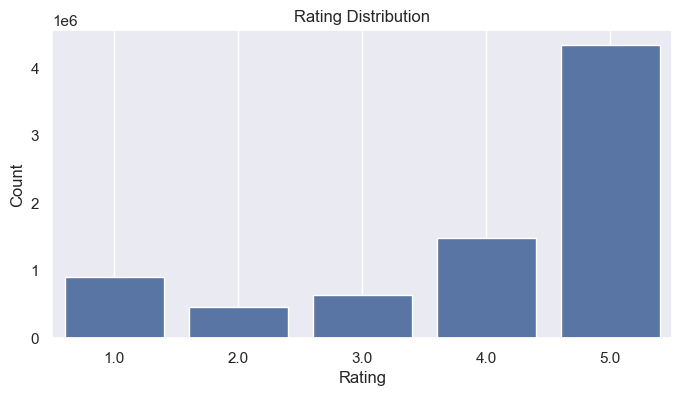

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

most of the user have given 5 rating

In [64]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  7824482
Total unique users :  4201696
Total unique products :  476002


analyzing the rating by user

In [65]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: rating, dtype: int64

In [66]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 1540 


<h1><b><u>Step4 - Train test split</u></b></h1>

In [67]:
from sklearn.model_selection import train_test_split


In [68]:
#Splitting surprise the dataset into 80,20 ratio using train_test_split
trainset, testset = train_test_split(electronics_data, test_size=0.2,random_state=42)

In [69]:
print("Total Data - ",electronics_data.shape)
print("Total Trainset - ",trainset.shape)
print("Total Testset - ",testset.shape)

Total Data -  (7824482, 3)
Total Trainset -  (6259585, 3)
Total Testset -  (1564897, 3)


In [70]:
trainset.head()

,userId,productId,rating
6194285,A77RBOGEVJ0LH,B008EGUIXQ,5.0
157162,A1JMDUJL19G3QO,B000067SOH,4.0
2708902,A1JNFS3IZ1XIXN,B002MAPS6W,5.0
2689500,A2L6GA5H674R3F,B002LK2QJK,4.0
3325115,A1Z5AREHVF8ERM,B003EVITCS,5.0


In [71]:
testset.head()

,userId,productId,rating
1157290,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0
2677500,ALDXDYEGKB27G,B002L6HE9G,4.0
5814180,A15LOGO6NBSI6B,B007MXGG5Q,5.0
6239751,A23LX12CA3G4FG,B008HOEDYU,1.0
5344316,A3TV7QFYXAG130,B0069R7TAM,5.0


<h1><b><u>Step5 - Selecting and evaluating the Recommendation Algorithm</u></b></h1>

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

1.  Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2.  Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on the assumption that people like things similar to other things they like, and things that are liked by other people with similar tastes.

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions


**Popularity Based Recommendation**

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

In [72]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [73]:
data.head()

,userId,productId,rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0


In [74]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [75]:
no_of_rating_per_product.head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: rating, dtype: int64

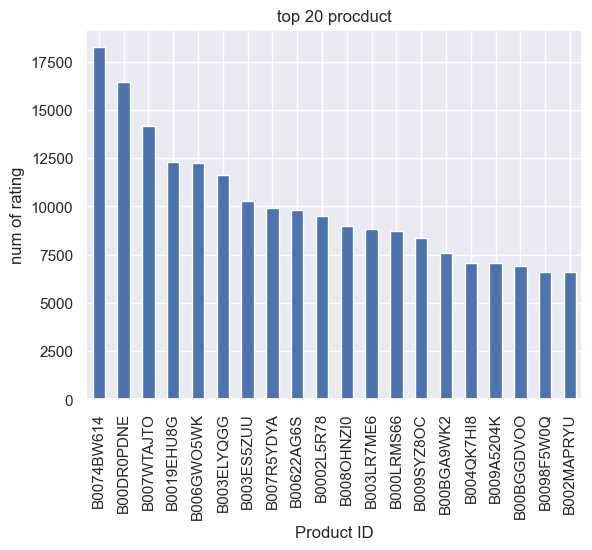

In [76]:
#top 20 product
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For example, product, ID # B0074BW614 has sales of over 18244, the next most popular product, ID # B00DR0PDNE has sales of 16454, etc.

In [77]:
#average rating product
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [78]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.470980
1400501466,3.560000
1400501520,4.243902
1400501776,3.884892
1400532620,3.684211


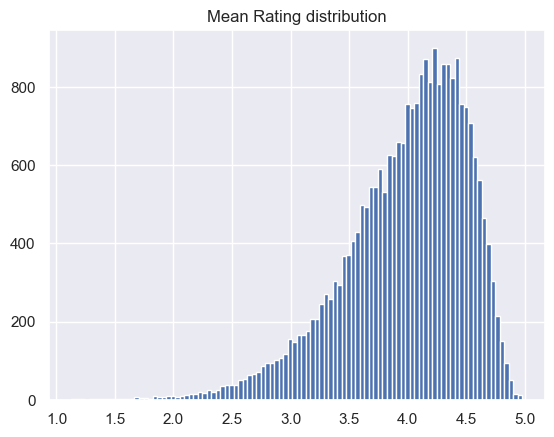

In [79]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [80]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

np.float64(-0.9512537061128555)

In [81]:
#it is highly negative skewed

In [82]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [83]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [84]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.491504,18244


In [85]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  468


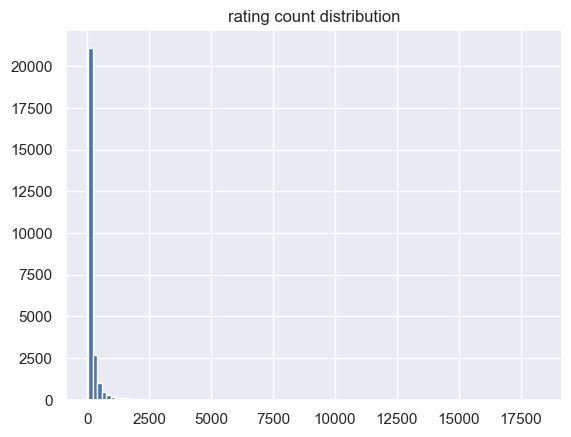

In [86]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

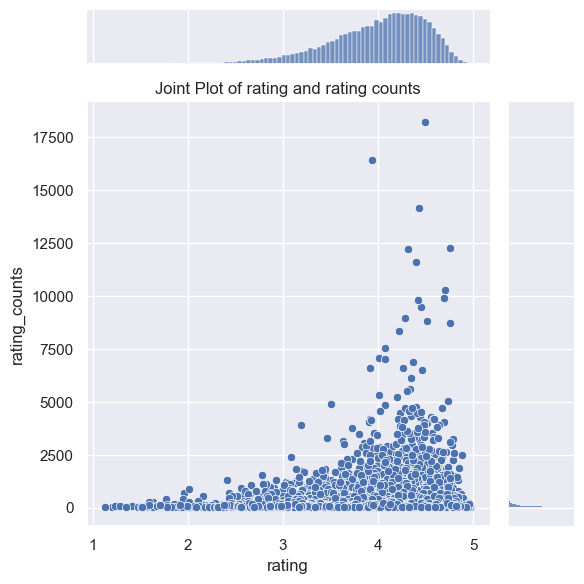

In [87]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

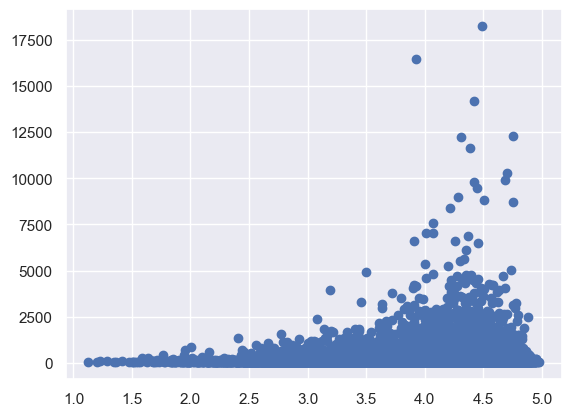

In [88]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [89]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.07358807628426928 


<h1><b><u>Step6 - Developing the Recommendation System</u></b></h1>

**Collaberative filtering**

Collaborative filtering is a technique commonly used in recommendation systems to predict a user's interests by collecting preferences or taste information from many users. The underlying assumption of collaborative filtering is that if users have agreed in the past, they will agree in the future on similar items or products. Collaborative filtering has two sub-categories which are generally called memory-based and model-based approaches.

<b>Model-based collaborative filtering system</b>
These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [90]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,3744295508,6301977173,9573212919,...,B00J5O7BMC,B00J8JLOA4,B00JGUR84Q,B00JKCH4X0,B00JSZGTW6,B00JTI4X3E,B00K0OBEE2,B00K4VQZCM,B00K91DB7Y,B00L3YHF6O
userId,,,,,,,,,,,,,,,,,,,,,
A0047322388NOTO4N8SKD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00970074O1C2N7GKBD8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01037873UQRDOUGJHATT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0148580153CCYEBHHVJ9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01842741JRH81ZPEGH7V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [91]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19897, 10329)

In [92]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A0047322388NOTO4N8SKD,A00970074O1C2N7GKBD8,A01037873UQRDOUGJHATT,A0148580153CCYEBHHVJ9,A01842741JRH81ZPEGH7V,A0240495330JKS21W63UP,A035646122YNXLICZAFCE,A03576872RBWLYJBRACB9,A0469281TKC18XMEWHEN,A0537988267XVX3XN1ZQV,...,AZX7PFFZ6R9OT,AZXHFSO67NPIZ,AZXIOFN3TDXQ1,AZXKG69RR28G4,AZY065T0PVYO7,AZY9H78K5ZK52,AZYBZEVISD0YX,AZZ1QIEWIUC1G,AZZBLQLAQIBZB,AZZVYHVJ8BDUZ
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140053271X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
x_ratings_matrix.shape

(10329, 19897)

In [94]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(10329, 10)

In [95]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(10329, 10329)

In [96]:
x_ratings_matrix.index[10]

'9625993428'

In [97]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

38


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [98]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(10329,)

In [99]:
correlation_matrix[correlation_product_ID>0.75].shape

(123, 10329)

In [100]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00001P4ZH',
 'B000067RC1',
 'B00007GQLU',
 'B000085BD8',
 'B00009R6VZ',
 'B0000CG4DI',
 'B00013M6NK',
 'B0001H9L3O',
 'B00025742A',
 'B0002A9SJ2',
 'B0002K6Y9E',
 'B0002XQDSS',
 'B000BUN79K',
 'B000CQ73PW',
 'B000EOOU6M',
 'B000ETXOC8',
 'B000ETY3LO',
 'B000FCSWX0',
 'B000FV8P24',
 'B000HHYEKI']

Product Id # Here are the top 20 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.